In [ ]:
# This project is about the "Business Sales" dataset
# Project Motive: To analyze sales patterns and uncover insights that affect total sale value.
# Goal: Understand the impact of various business features on overall sales performance.

# Part (A): Exploratory Data Analysis (EDA)

# 1. Preprocessing Steps
#    - Load dataset
#    - Identify column types
#    - Check dataset shape and structure

# 2. Identifying Missing Values
#    - Check for null values across columns
#    - Analyze missing data percentage

# 3. Summary Statistics
#    - Generate descriptive stats for numerical and categorical features

# 4. Visualization of Relations Between Various Factors and Sales
#    - Countplots for categorical variables (e.g., product type, region, payment method)
#    - Histograms for numerical variables (e.g., unit price, quantity)
#    - Scatter plots showing relationship between Unit Price and Total Sale Value

# 5. Correlation Analysis
#    - Correlation matrix of numerical features
#    - Heatmap to visualize correlation strength

# 6. Finding Outliers and Visualizations
#    - Boxplots for numerical features to detect outliers
#    - Distribution plots to check skewness

# Part (B): Model Building

# 1. Objective
#    - To predict whether a product is likely to be returned based on transaction-related features.
#    - Helps businesses reduce return rates and identify at-risk transactions.

# 2. Data Preprocessing
#    - Standardized values in 'Customer_Gender', 'Sales_Channel', and 'Returned' columns.
#    - Filled missing values in numerical features using median or formula-based imputation.
#    - Categorical columns filled with "Unknown" where applicable.
#    - Encoded categorical features using Label Encoding for model compatibility.

# 3. Feature Selection
#    - Chose relevant features: Customer Age, Gender, Product Category, Quantity, Unit Price, Discount, Payment Method, Store Region, Sales Channel, Loyalty Tier, and Total Sale Value.
#    - Dropped non-informative or identifier columns like Transaction_ID.

# 4. Train-Test Split
#    - Divided data into training (80%) and testing (20%) sets using train_test_split.

# 5. Model Training
#    - Used Random Forest Classifier due to its robustness and ease of handling mixed-type data.
#    - Trained the model with default hyperparameters (n_estimators=100, random_state=42).

# 6. Model Evaluation
#    - Evaluated using Accuracy Score, Confusion Matrix, and Classification Report.
#    - Assessed overall performance, precision, recall, and F1-score of predictions.

# 7. Feature Importance
#    - Extracted and visualized feature importance using a barplot.
#    - Identified which input features most strongly influence return predictions.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
#part A

In [3]:
df = pd.read_csv("Business_Sales.csv")

In [4]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (10000, 15)


In [5]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (10000, 15)


In [6]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['Transaction_ID', 'Date', 'Customer_Age', 'Customer_Gender', 'Product_Category', 'Quantity', 'Unit_Price', 'Discount (%)', 'Payment_Method', 'Store_Region', 'Sales_Channel', 'Customer_Loyalty_Tier', 'Returned', 'Sales_Rep_ID', 'Total_Sale_Value']


In [7]:
print("\nData Types:",df.dtypes)


Data Types: Transaction_ID            object
Date                      object
Customer_Age             float64
Customer_Gender           object
Product_Category          object
Quantity                 float64
Unit_Price               float64
Discount (%)             float64
Payment_Method            object
Store_Region              object
Sales_Channel             object
Customer_Loyalty_Tier     object
Returned                  object
Sales_Rep_ID              object
Total_Sale_Value         float64
dtype: object


In [8]:
print("\nFirst 5 Rows:",df.head())


First 5 Rows:   Transaction_ID        Date  Customer_Age Customer_Gender Product_Category  \
0        T200000  2022-04-13          61.0               M              NaN   
1        T200001  2023-03-12          51.0          Female         Clothing   
2        T200002  2022-09-28          53.0               F             Home   
3        T200003  2022-04-17          18.0             NaN           Sports   
4        T200004  2022-03-13          32.0           Other             Home   

   Quantity  Unit_Price  Discount (%) Payment_Method Store_Region  \
0       8.0      155.87           6.2            UPI         West   
1       2.0      265.63          34.0            NaN        North   
2       4.0       32.16          38.9           Card         East   
3       9.0      163.47          45.8            UPI      Central   
4       6.0      479.94          33.6         Online         West   

  Sales_Channel Customer_Loyalty_Tier Returned Sales_Rep_ID  Total_Sale_Value  
0             F

In [9]:
#Summary Statistics
print("\nSummary Statistics:",df.describe(include='all'))


Summary Statistics:        Transaction_ID        Date  Customer_Age Customer_Gender  \
count           10000       10000   9999.000000            8362   
unique          10000         730           NaN               5   
top           T209983  2022-03-14           NaN           Other   
freq                1          25           NaN            1777   
mean              NaN         NaN     43.433643             NaN   
std               NaN         NaN     15.084604             NaN   
min               NaN         NaN     18.000000             NaN   
25%               NaN         NaN     31.000000             NaN   
50%               NaN         NaN     43.000000             NaN   
75%               NaN         NaN     57.000000             NaN   
max               NaN         NaN     69.000000             NaN   

       Product_Category     Quantity   Unit_Price  Discount (%)  \
count              7077  9998.000000  9999.000000   9999.000000   
unique                5          NaN    

In [10]:
#Missing Value Analysis
print("\nMissing Values:",df.isnull().sum())


Missing Values: Transaction_ID              0
Date                        0
Customer_Age                1
Customer_Gender          1638
Product_Category         2923
Quantity                    2
Unit_Price                  1
Discount (%)                1
Payment_Method           3314
Store_Region             2886
Sales_Channel            1951
Customer_Loyalty_Tier    3382
Returned                 3279
Sales_Rep_ID              193
Total_Sale_Value            0
dtype: int64


In [11]:
#Check for Duplicates

print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


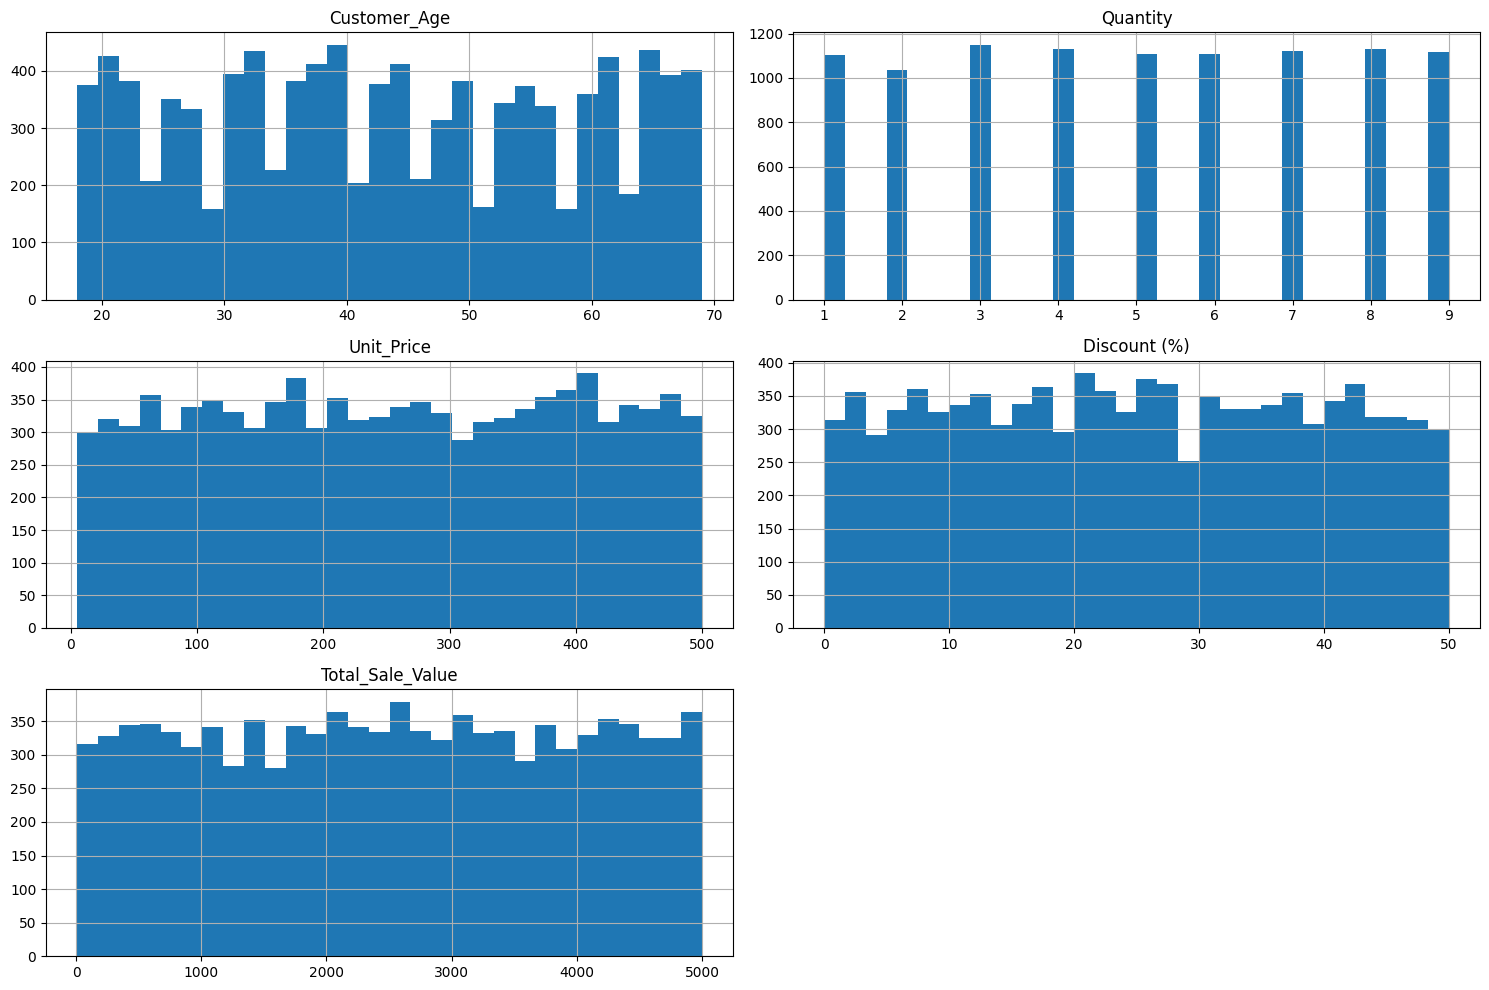

In [12]:
#visualisation of Numeric columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

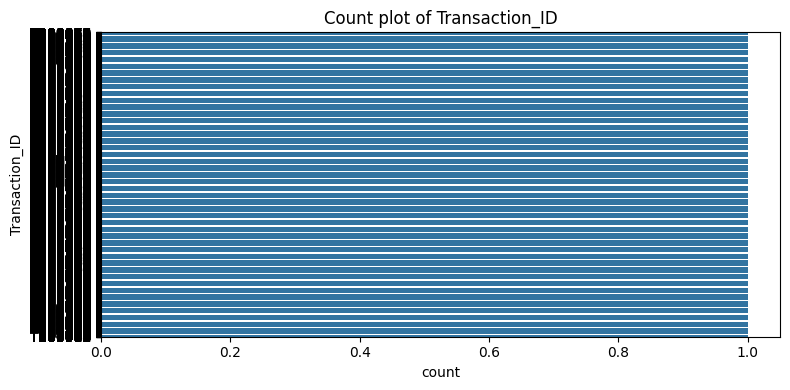

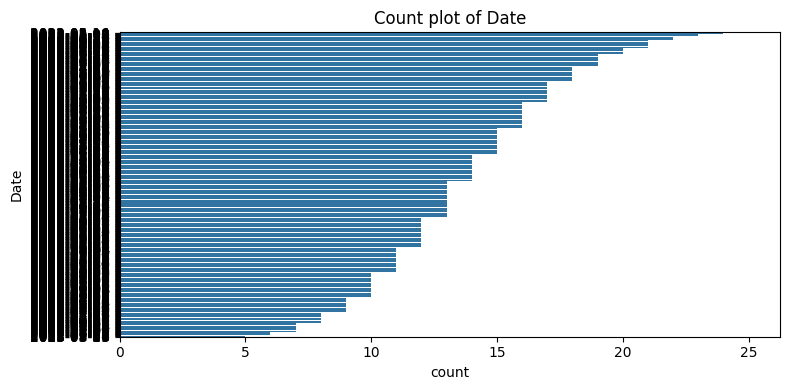

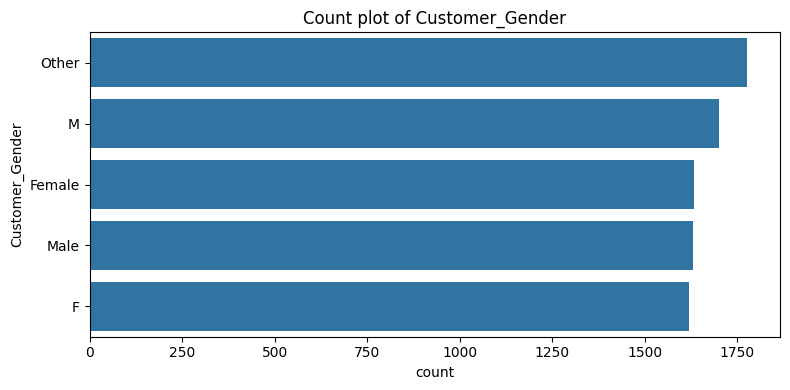

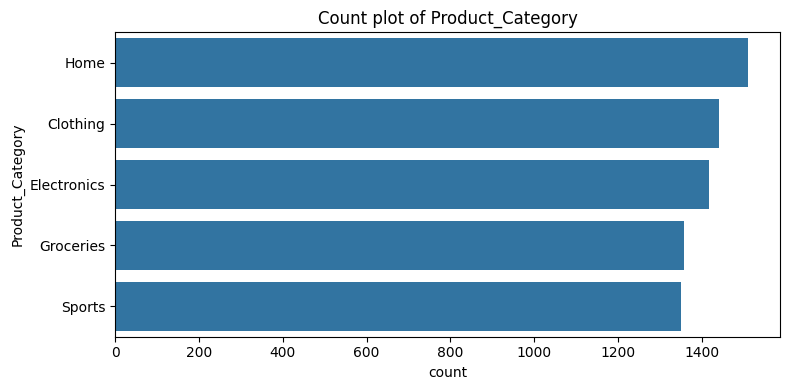

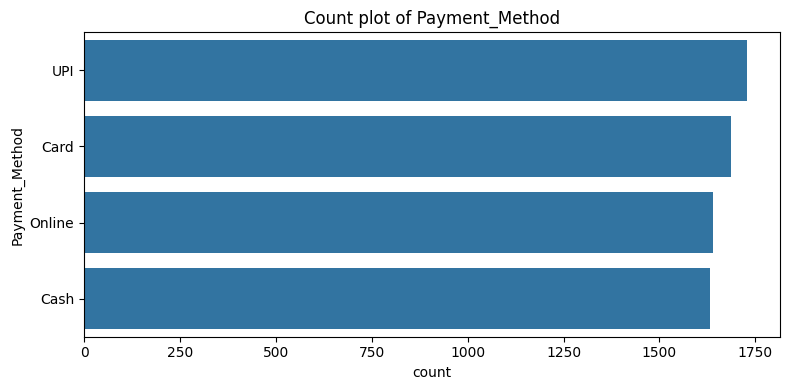

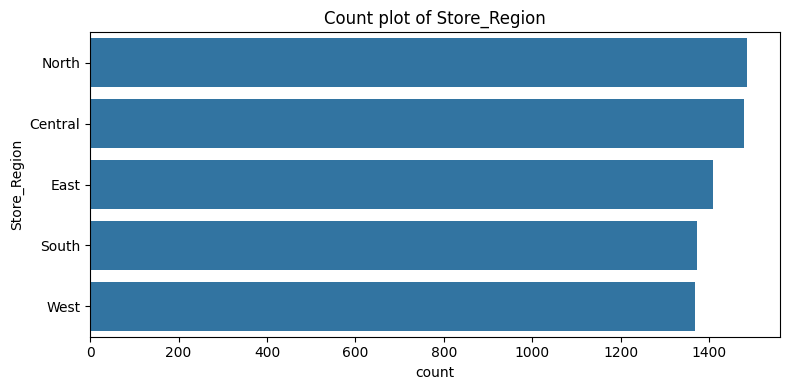

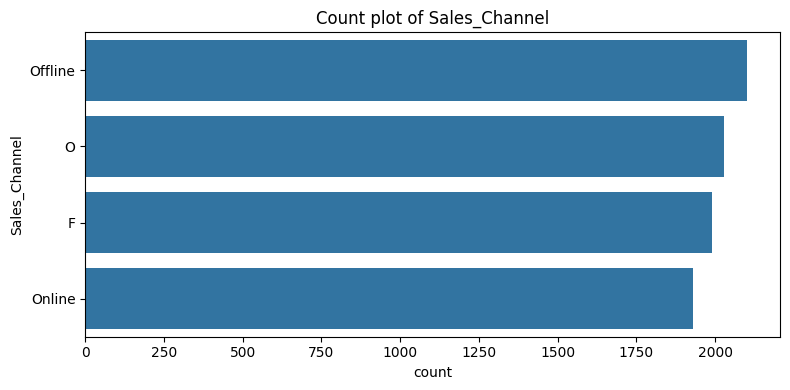

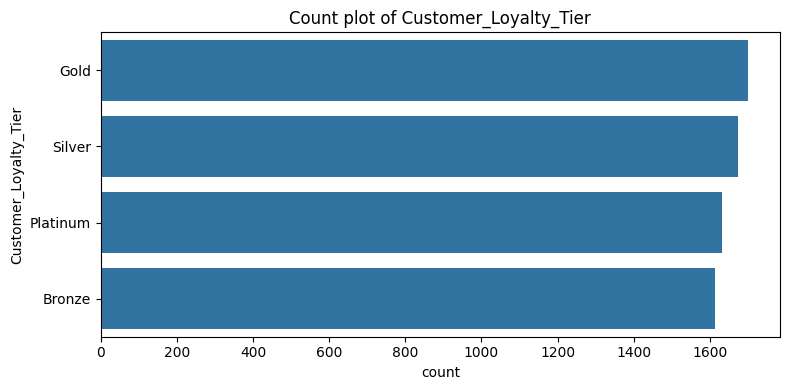

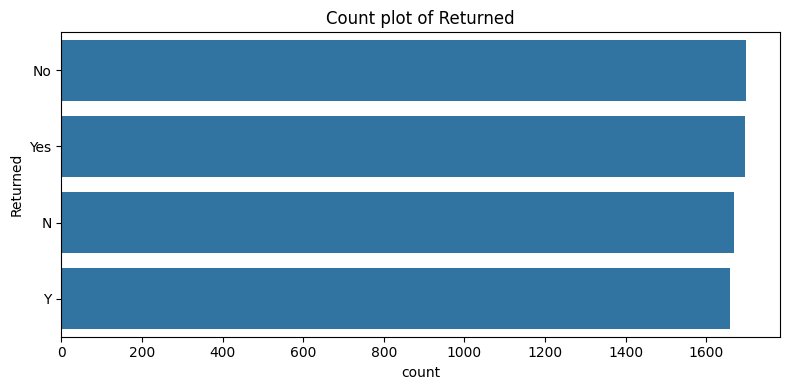

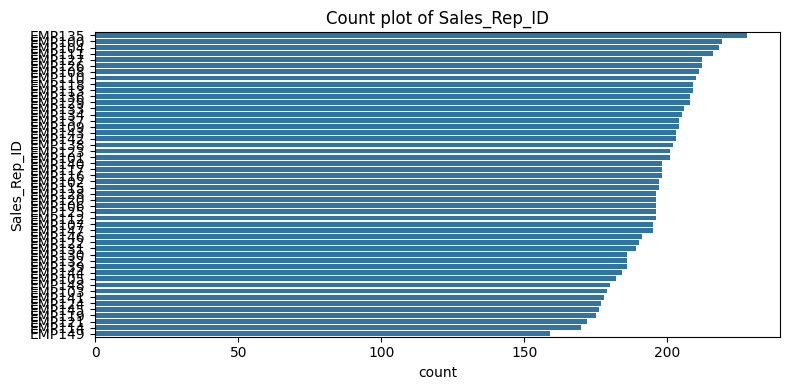

In [13]:
#visualisation of Categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count plot of {col}")
    plt.tight_layout()
    plt.show()

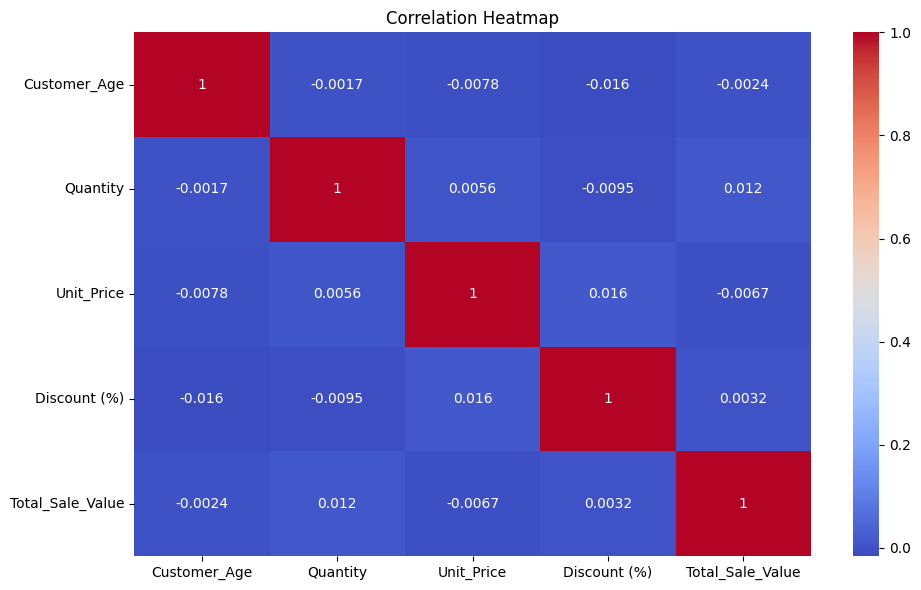

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

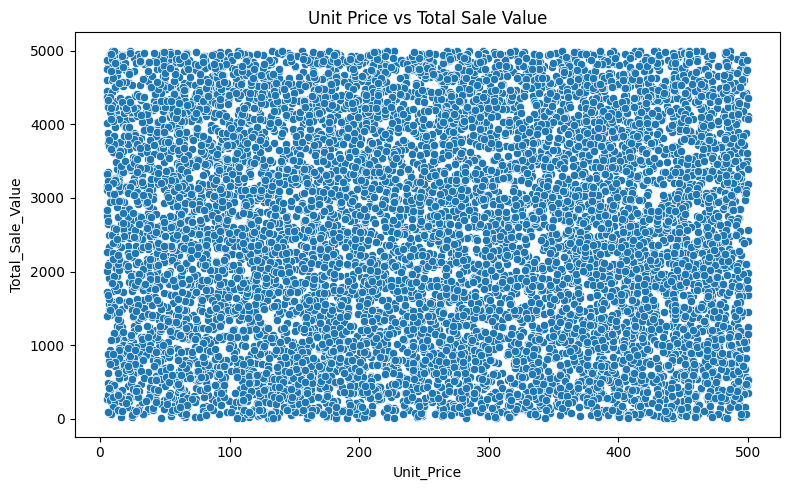

In [15]:
#Relationship Plots
if "Total_Sale_Value" in df.columns and "Unit_Price" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x="Unit_Price", y="Total_Sale_Value", data=df)
    plt.title("Unit Price vs Total Sale Value")
    plt.tight_layout()
    plt.show()

In [16]:
#Summary
print("\nEDA Complete. Investigate above visualizations and statistics to understand patterns, distributions, and issues in the dataset.")



EDA Complete. Investigate above visualizations and statistics to understand patterns, distributions, and issues in the dataset.


In [ ]:
#part b model Building

In [17]:
#preprocessing
df['Customer_Gender'] = df['Customer_Gender'].replace({"M": "Male", "F": "Female"})
df['Sales_Channel'] = df['Sales_Channel'].replace({"O": "Online", "F": "Offline"})
df['Returned'] = df['Returned'].replace({"Y": "Yes", "N": "No"})

In [21]:
#Fill missing values
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())
df['Unit_Price'] = df['Unit_Price'].fillna(df['Unit_Price'].median())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Discount (%)'] = df['Discount (%)'].fillna(0)
df['Total_Sale_Value'] = df['Total_Sale_Value'].fillna(
    df['Unit_Price'] * df['Quantity'] * (1 - df['Discount (%)'] / 100)
)


In [23]:
#Categorical Columns
categorical_cols = ['Customer_Gender', 'Product_Category', 'Payment_Method', 'Store_Region',
                    'Sales_Channel', 'Customer_Loyalty_Tier']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [24]:
#label Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
# Drop rows with missing/invalid target values
df = df[df['Returned'].isin(['Yes', 'No'])]
df['Returned'] = df['Returned'].map({'Yes': 1, 'No': 0})

In [26]:
#Feature Selection
features = ['Customer_Age', 'Customer_Gender', 'Product_Category', 'Quantity', 'Unit_Price',
            'Discount (%)', 'Payment_Method', 'Store_Region', 'Sales_Channel',
            'Customer_Loyalty_Tier', 'Total_Sale_Value']
target = 'Returned'
X = df[features]
y = df[target]

In [27]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
#Evaluation
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.4855018587360595

Confusion Matrix:
 [[331 355]
 [337 322]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       686
           1       0.48      0.49      0.48       659

    accuracy                           0.49      1345
   macro avg       0.49      0.49      0.49      1345
weighted avg       0.49      0.49      0.49      1345



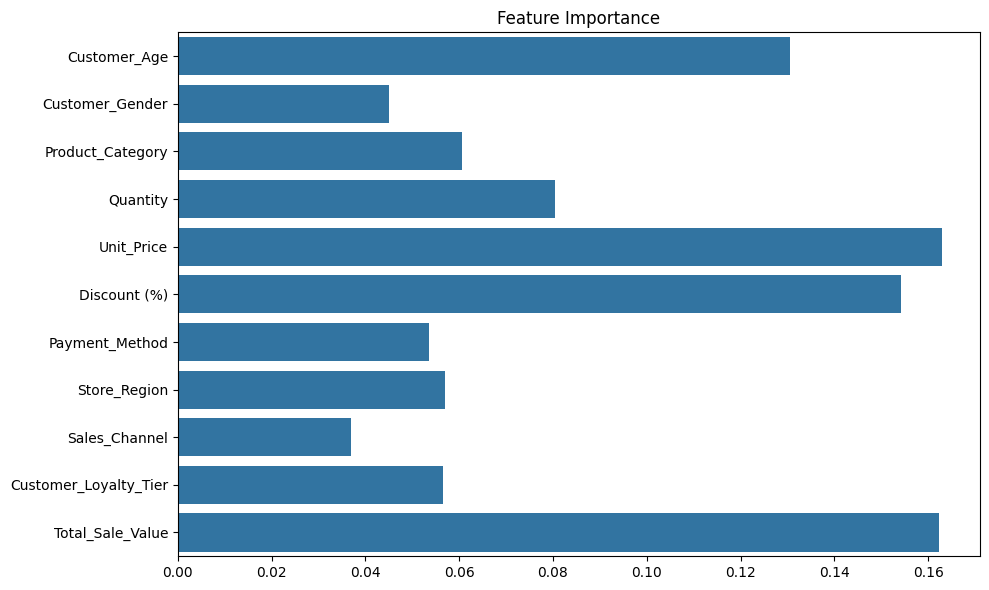

In [30]:
#Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()